In [1]:
# Loading the dataset
# Import pandas library
import pandas as pd
# Import numpy
import numpy as np
# Reading the dataset
mydata = pd.read_csv("MT1-area-radiusandulna-aim.csv")

In [2]:
mydata.head()

,URN,R_area,U_area,Age
0,ML018_T1_001,13.125,0.00,243
1,ML018_T1_002,0.000,16.75,243
2,ML018_T1_003,0.000,2.00,243
3,ML018_T1_004,0.000,0.00,243
4,ML018_T1_005,0.000,0.00,243


In [3]:
mydata.describe()

,R_area,U_area,Age
count,690.000000,690.000000,690.000000
mean,65.428261,27.645652,238.740580
std,125.115857,67.913287,44.892947
min,0.000000,0.000000,124.000000
25%,0.000000,0.000000,208.000000
50%,0.000000,0.000000,246.000000
75%,58.375000,7.343750,272.000000
max,626.125000,529.875000,323.000000


In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   URN     690 non-null    object 
 1   R_area  690 non-null    float64
 2   U_area  690 non-null    float64
 3   Age     690 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 21.7+ KB


In [5]:
X = mydata.drop(['URN', 'Age'], axis = 1)
print(X)

     R_area  U_area
0    13.125    0.00
1     0.000   16.75
2     0.000    2.00
3     0.000    0.00
4     0.000    0.00
..      ...     ...
685   0.000    0.00
686  25.000    3.00
687  16.625    0.00
688   0.000    0.00
689   0.000    0.00

[690 rows x 2 columns]


In [6]:
y = mydata['Age']
print(y)

0      243
1      243
2      243
3      243
4      243
      ... 
685    227
686    227
687    227
688    227
689    227
Name: Age, Length: 690, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

# Splitting the dataset in train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(483, 2) (207, 2) (483,) (207,)


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 596 to 684
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R_area  483 non-null    float64
 1   U_area  483 non-null    float64
dtypes: float64(2)
memory usage: 11.3 KB


In [9]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 483 entries, 596 to 684
Series name: Age
Non-Null Count  Dtype
--------------  -----
483 non-null    int64
dtypes: int64(1)
memory usage: 7.5 KB


In [10]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 14 to 90
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R_area  207 non-null    float64
 1   U_area  207 non-null    float64
dtypes: float64(2)
memory usage: 4.9 KB


In [11]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 207 entries, 14 to 90
Series name: Age
Non-Null Count  Dtype
--------------  -----
207 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [12]:
pd.set_option('display.max_rows', 500)
print(y_test)

14     231
586    275
140    220
492    246
350    235
672    217
501    196
342    255
312    201
412    238
1      243
31     314
403    272
449    258
514    173
374    250
523    296
231    138
548    323
252    308
598    211
682    217
229    138
75     275
675    217
258    308
210    276
338    206
563    203
235    138
601    211
499    196
175    258
633    208
113    299
299    289
637    270
8      231
68     261
573    154
665    298
85     221
263    305
240    269
621    271
424    260
50     274
413    238
439    168
79     275
666    298
452    281
249    212
10     231
330    264
627    208
527    296
295    286
536    224
283    267
538    224
447    258
502    196
451    281
689    227
103    277
367    250
522    296
156    142
641    270
354    235
266    305
261    305
200    289
187    234
196    234
686    227
680    217
337    206
37     203
539    323
48     274
465    173
327    264
165    184
222    250
402    272
76     275
64     261
52     274
613    287

In [13]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Instantiation of the model

model = RandomForestRegressor()
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('regressor', model)
        ])

In [14]:
# Fitting the model

Age_rf = model.fit(X_train, y_train)

In [15]:
# Training model evaluation
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# The training r_sq
print('The training r_sq is: %.2f' % Age_rf.score(X_train, y_train))

# Prediction on the training dataset
ytrain_pred = Age_rf.predict(X_train)

# The MAE
print('The MAE is: %.2f' % mean_absolute_error(y_train, ytrain_pred))

# The MAPE 
print('The MAPE is: %.2f' % mean_absolute_percentage_error(y_train, ytrain_pred))

# The MSE
print('The MSE is: %.2f' % mean_squared_error(y_train, ytrain_pred))

# The RMSE
print('The RMSE is: %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

# The EVS
print('The EVS is: %.2f' % explained_variance_score(y_train, ytrain_pred))

The training r_sq is: 0.81
The MAE is: 14.37
The MAPE is: 0.06
The MSE is: 377.37
The RMSE is: 19.43
The EVS is: 0.81


In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Age_rf, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
rf_rmse_scores = np.sqrt(-scores)

In [17]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(rf_rmse_scores)

Scores: [24.0456215  29.61156789 25.9460897  25.13596818 22.8305333  25.77641427
 27.52904641 27.61223707 24.02528991 27.71088079]
Mean: 26.022364903009567
Standard deviation: 1.9866269763324944


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [64, 128, 256], 'max_features': [2, 4, 6, 8]}, 
    {'bootstrap': [False], 'n_estimators': [64, 128, 256], 'max_features': [2, 4, 6, 8], 'max_depth': [2, 4, 8, 16, 36, 64]}
]

Age_rf = RandomForestRegressor()

grid_search = GridSearchCV(Age_rf, param_grid, cv= 10, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'bootstrap': False, 'max_depth': 4, 'max_features': 2, 'n_estimators': 256}

In [19]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=4, max_features=2,
                      n_estimators=256)

In [20]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres ["params"]):
    print(np.sqrt(-mean_score), params)

26.126551762874865 {'max_features': 2, 'n_estimators': 64}
25.93497577865053 {'max_features': 2, 'n_estimators': 128}
25.956738096783674 {'max_features': 2, 'n_estimators': 256}
26.017837164046497 {'max_features': 4, 'n_estimators': 64}
25.959310412667698 {'max_features': 4, 'n_estimators': 128}
25.850562535478915 {'max_features': 4, 'n_estimators': 256}
26.026500587445405 {'max_features': 6, 'n_estimators': 64}
25.957956322080786 {'max_features': 6, 'n_estimators': 128}
25.963713963766853 {'max_features': 6, 'n_estimators': 256}
26.24998071564278 {'max_features': 8, 'n_estimators': 64}
25.963125030055398 {'max_features': 8, 'n_estimators': 128}
25.921713982055053 {'max_features': 8, 'n_estimators': 256}
26.312724633953263 {'bootstrap': False, 'max_depth': 2, 'max_features': 2, 'n_estimators': 64}
26.31272463395324 {'bootstrap': False, 'max_depth': 2, 'max_features': 2, 'n_estimators': 128}
26.312724633953277 {'bootstrap': False, 'max_depth': 2, 'max_features': 2, 'n_estimators': 256}


In [21]:
print('The training r_sq is: %.2f' % grid_search.best_estimator_.score(X_train, y_train))

The training r_sq is: 0.72


In [22]:
final_model = Age_rf

In [23]:
# Prediction on the testing data
final_model.fit(X_train, y_train)
final_prediction = final_model.predict(X_test)

In [24]:
print(final_prediction)

[218.779      270.19581948 181.76       233.19       270.19581948
 270.19581948 156.91       235.39733333 170.52       270.19581948
 227.81       270.19581948 270.19581948 270.19581948 167.98
 270.19581948 270.19581948 149.86       270.19581948 270.19581948
 186.66       270.19581948 148.23       270.19581948 233.38
 270.19581948 270.19581948 242.32       238.58       144.62
 224.44       177.19       270.19581948 146.73       270.19581948
 270.19581948 270.19581948 270.19581948 270.19581948 178.03
 270.19581948 270.19581948 270.19581948 222.22521825 270.19581948
 270.19581948 270.19581948 270.19581948 211.65       270.19581948
 270.19581948 270.19581948 173.64       270.19581948 224.85
 202.69       270.19581948 270.19581948 270.19581948 270.19581948
 270.19581948 270.19581948 183.97       270.19581948 270.19581948
 270.19581948 270.19581948 270.19581948 186.9        270.19581948
 238.83       270.19581948 270.19581948 270.19581948 255.72
 270.19581948 217.53       246.76833333 216.48

In [25]:
# The testing coef. of determination
print('The testing r_sq is: %.2f' % final_model.score(X_test, y_test))

# The metrics 
# The MAE
print('The MAE is: %.2f' % mean_absolute_error(y_test, final_prediction))

# The MAPE 
print('The MAPE is: %.2f' % mean_absolute_percentage_error(y_test,final_prediction))

# The MSE
print('The MSE is: %.2f' % mean_squared_error(y_test, final_prediction))

# The RMSE
print('The RMSE is:', np.sqrt(mean_squared_error(y_test, final_prediction)))

# The EVS
print('The EVS is: %.2f' % explained_variance_score(y_test, final_prediction))

The testing r_sq is: 0.63
The MAE is: 22.15
The MAPE is: 0.10
The MSE is: 789.35
The RMSE is: 28.095337127486488
The EVS is: 0.63


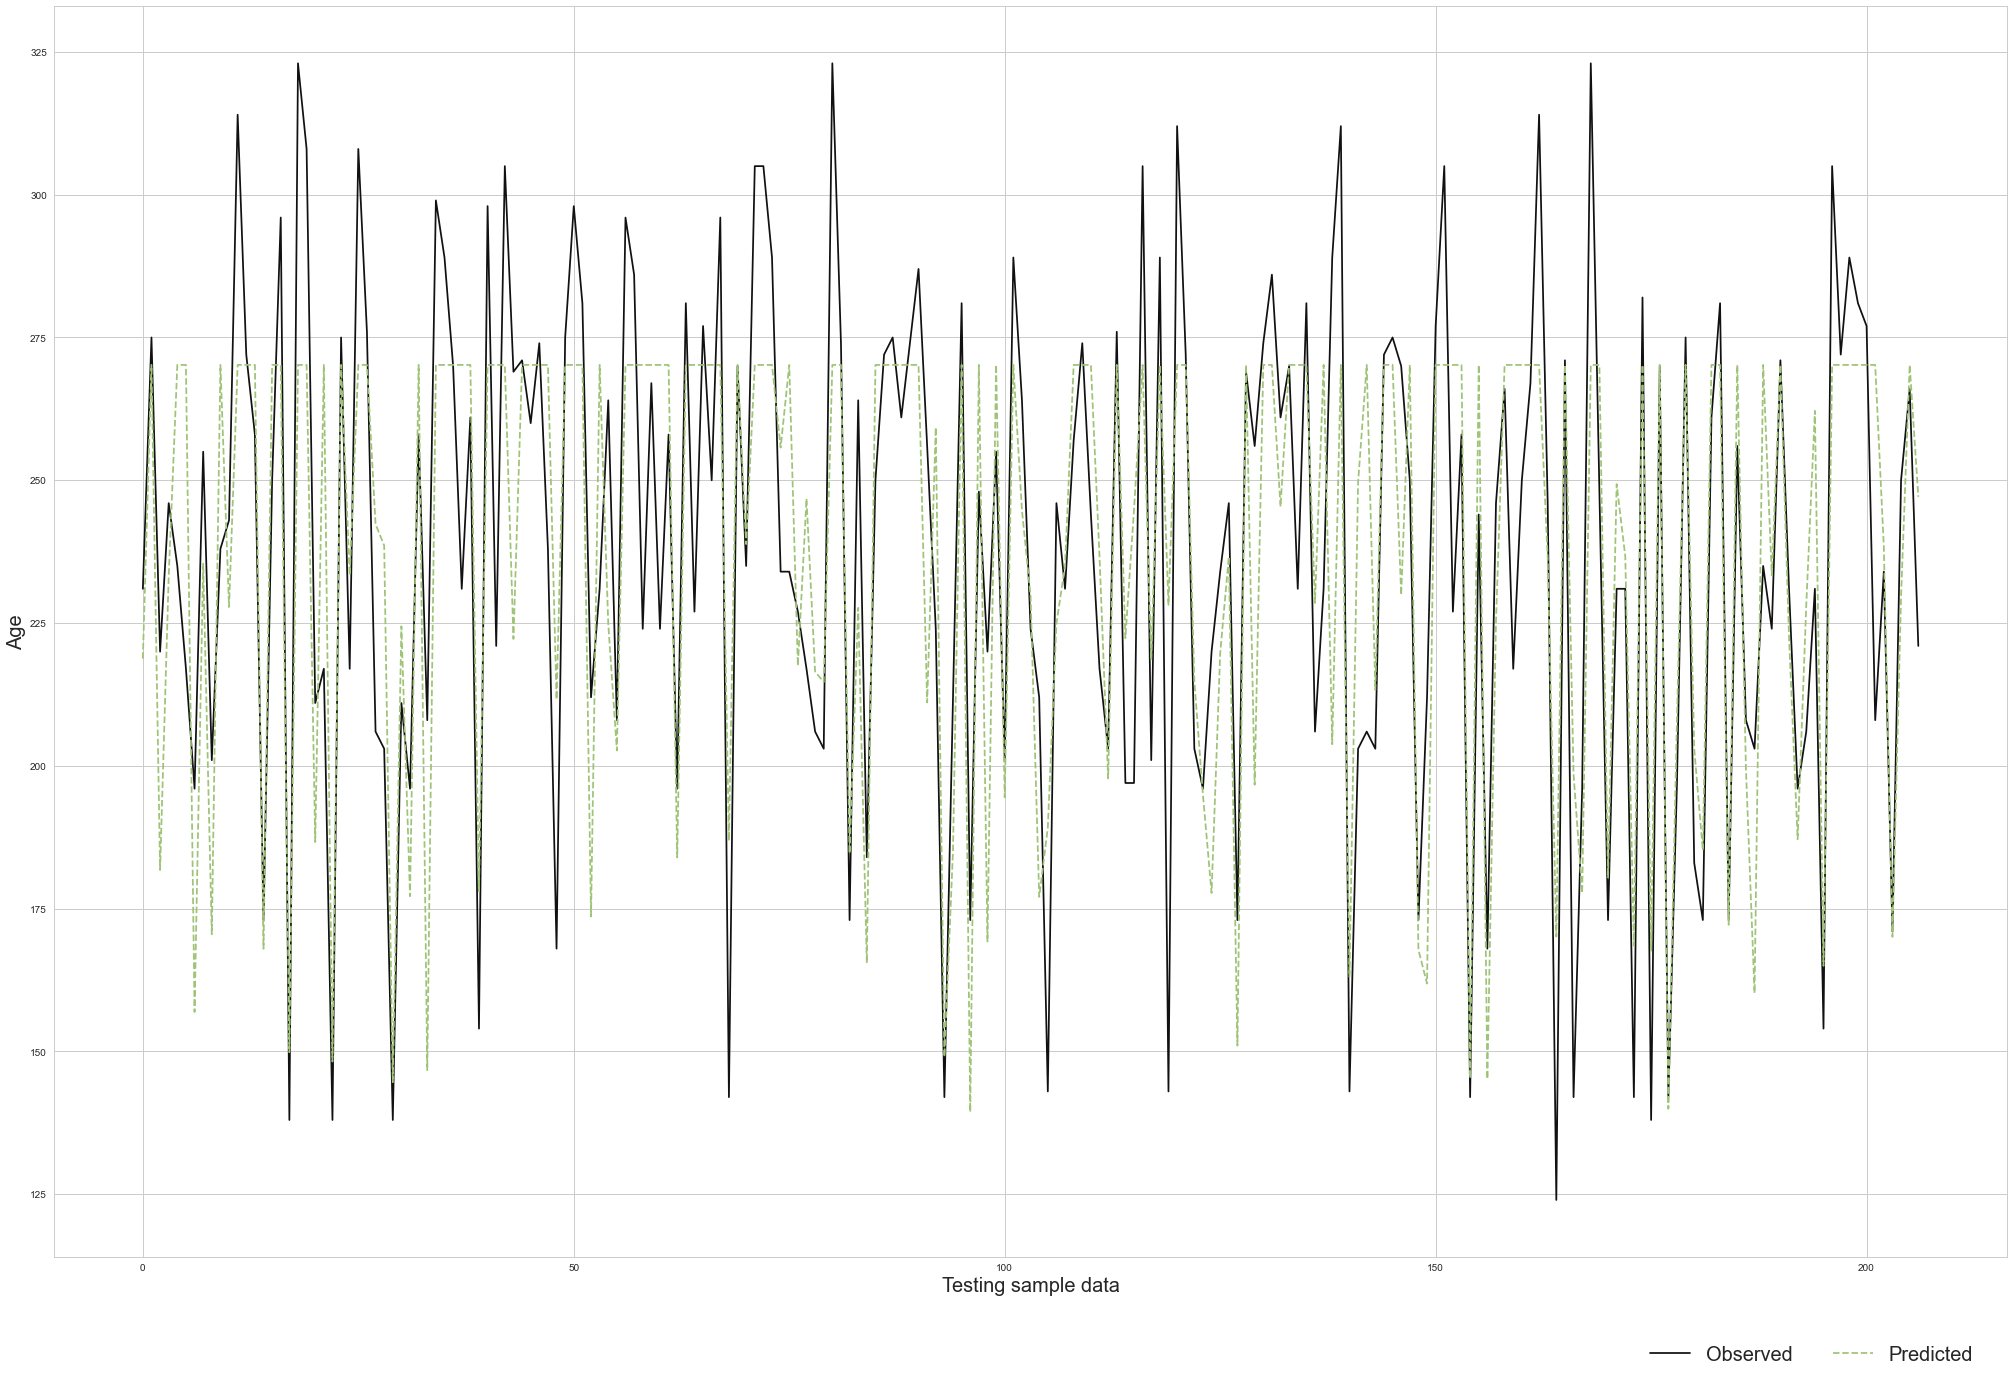

In [34]:
# Plotting the observed and predicted data
import matplotlib.pyplot as plt
#Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (35,23)
x_ax = range(len(X_test))
# Plotting
plt.plot(x_ax, y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, final_prediction, label = 'Predicted', color = 'g', linestyle = '--')
plt.ylabel('Age', fontsize = "20")
plt.xlabel('Testing sample data', fontsize = "20")
plt.legend(bbox_to_anchor = (0.9, -0.1), loc = 'lower center', fontsize = "20", ncol = 2, frameon = False)

In [27]:
# Plotting the prediction error and residuals using yellowbrick
# Anaconda/Cmd prompt and type: pip install yellowbrick!pip install yellowbrick"

In [28]:
!pip install yellowbrick

/Users/vpanci/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


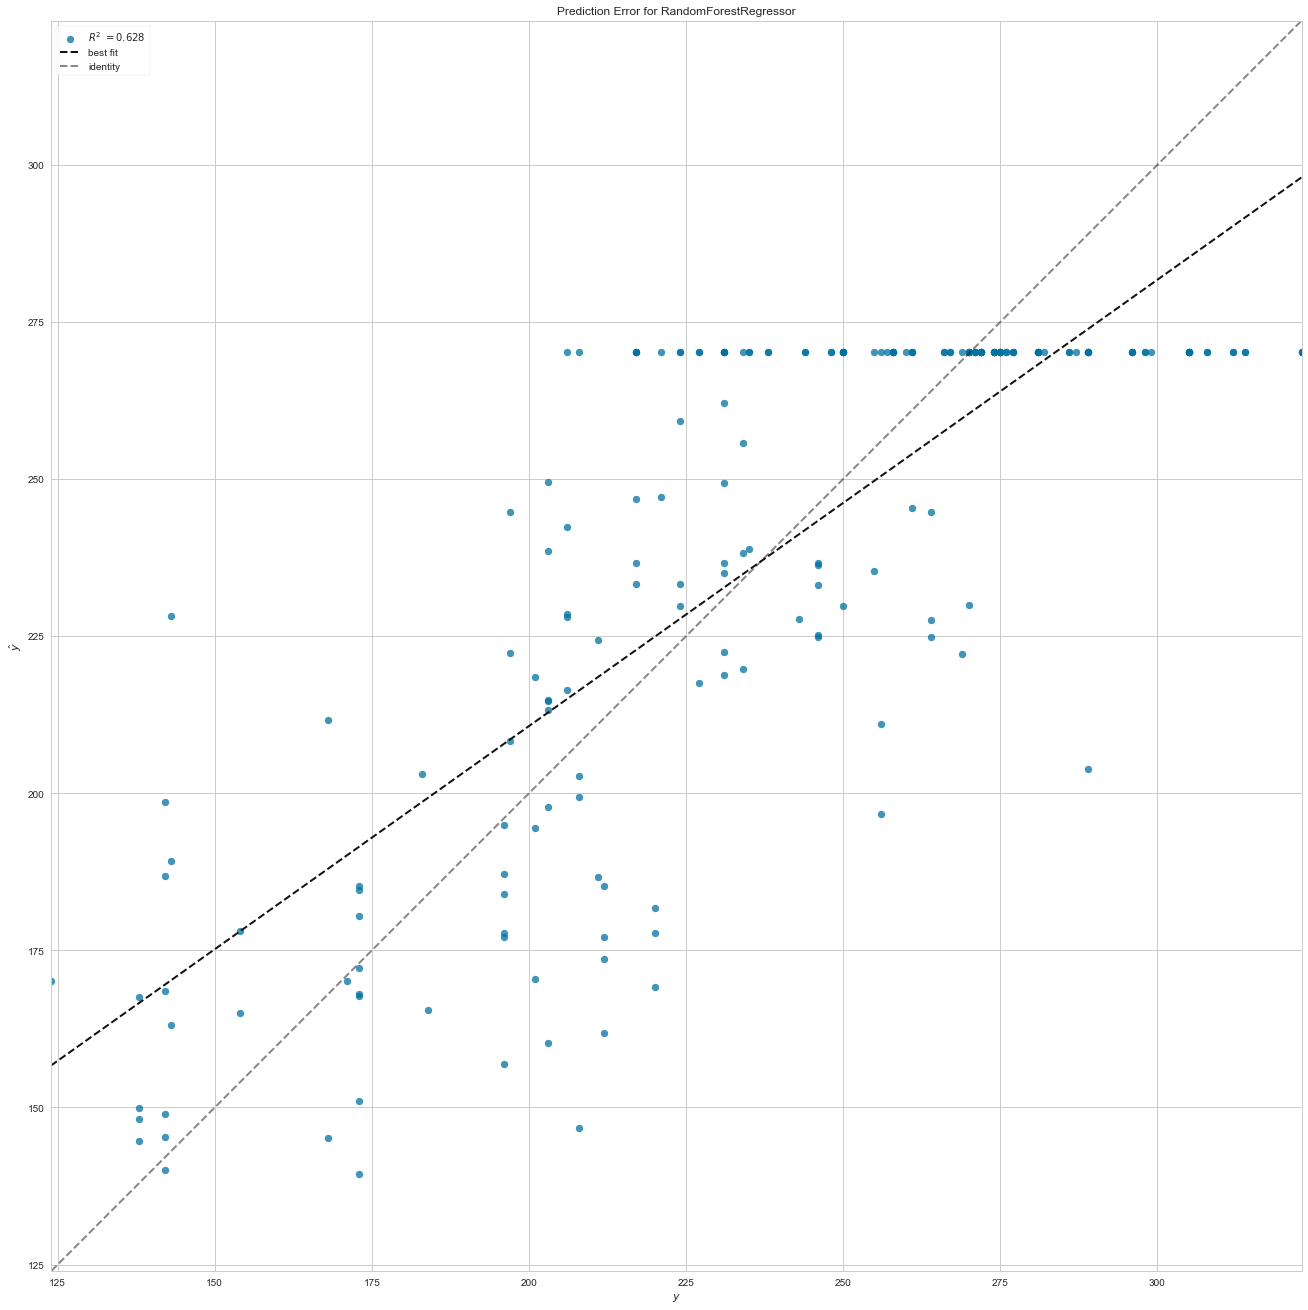

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [35]:
# Plotting the prediction errors
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(final_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

/Users/vpanci/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


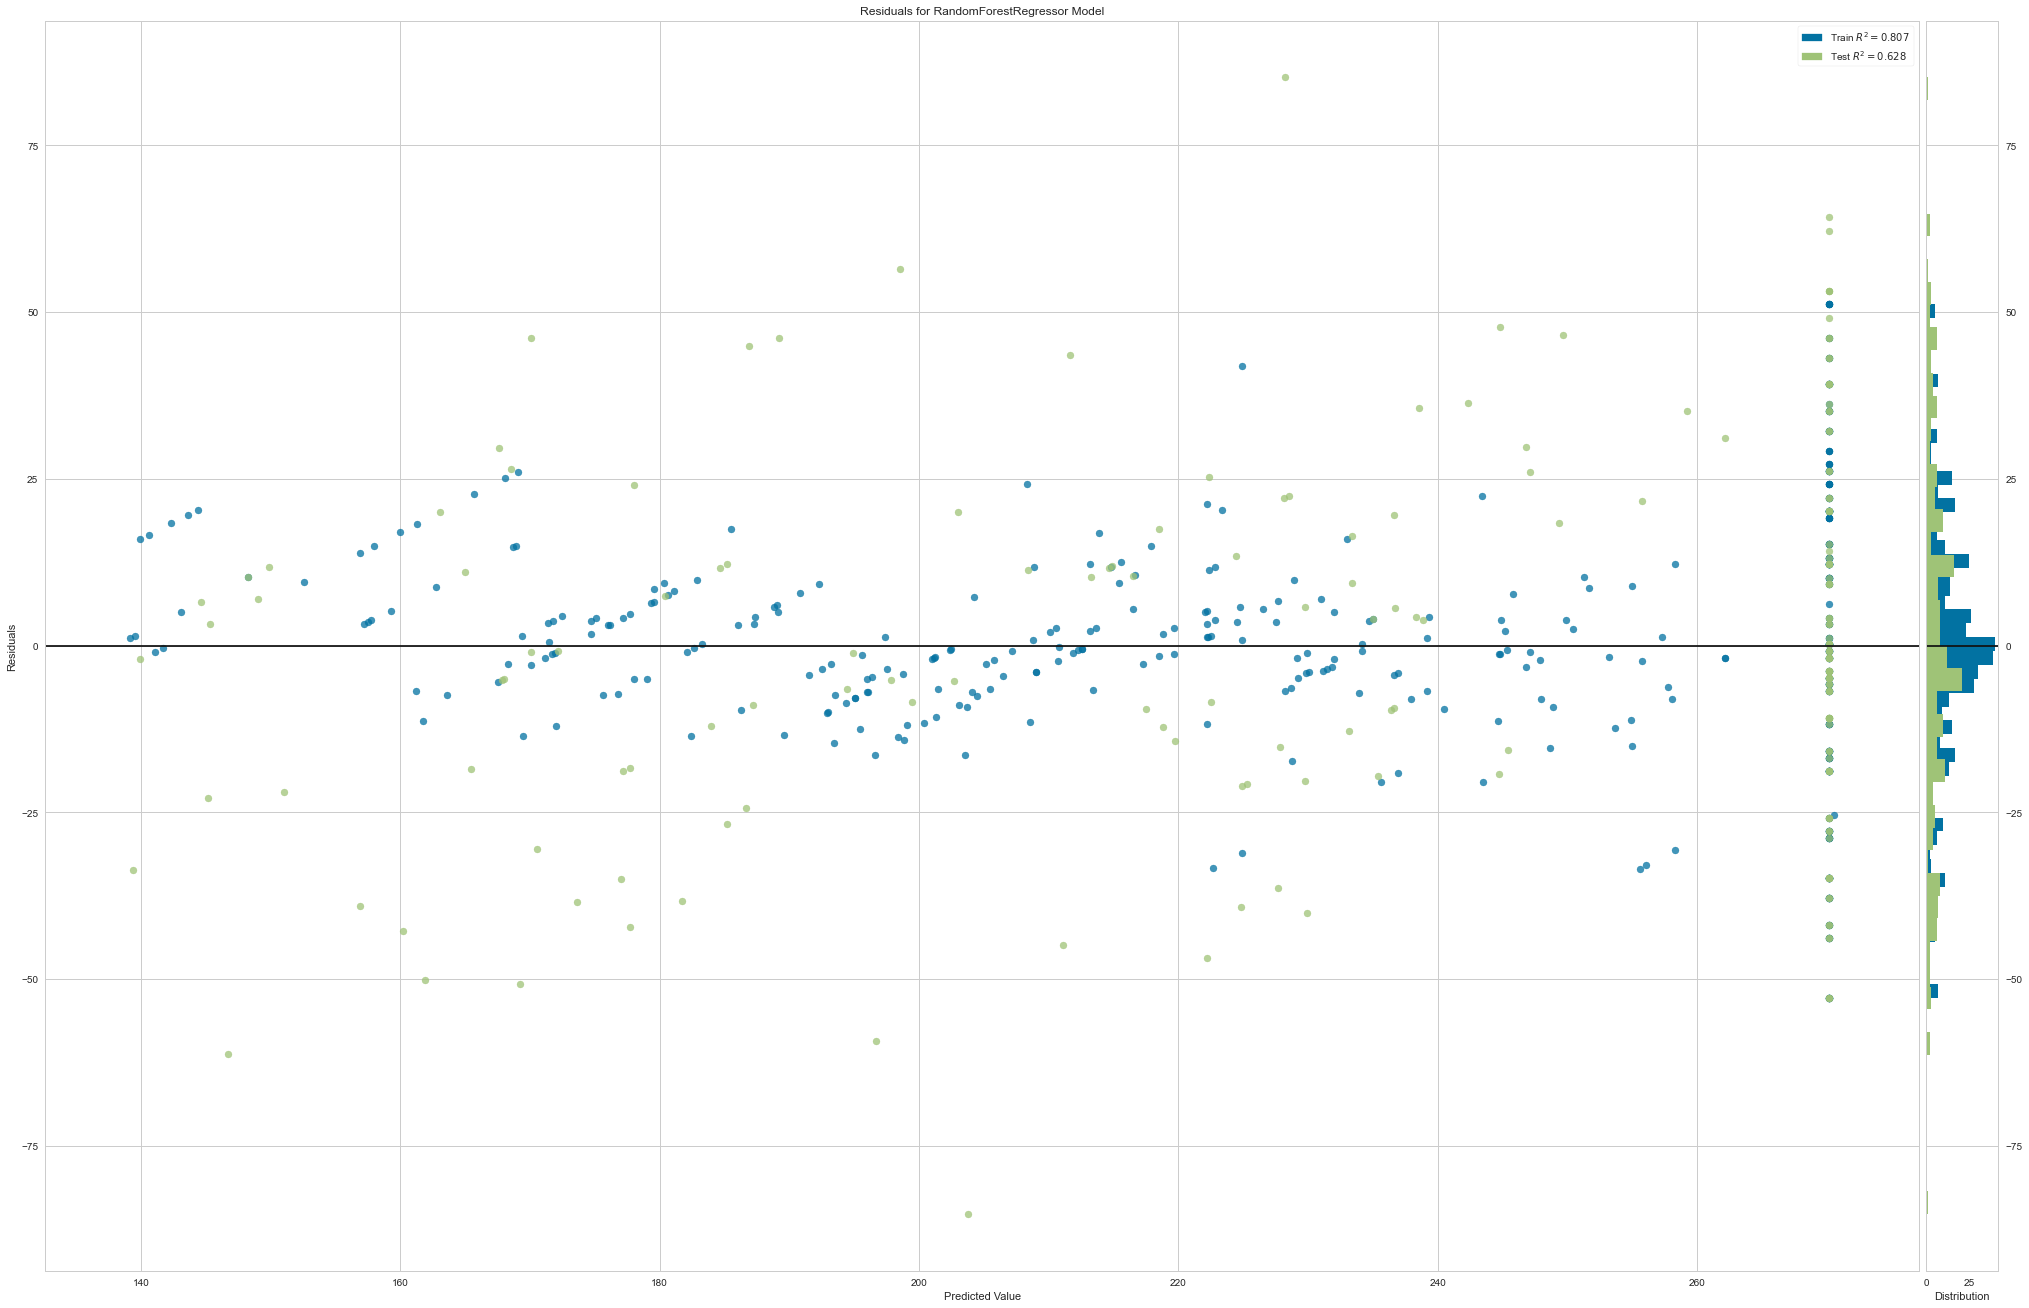

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [36]:
# Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(final_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [31]:
from sklearn.pipeline import Pipeline

f_list = list(X.columns)
f_importance = pd.Series(final_model.feature_importances_, index = f_list).sort_values(ascending = False)
print(f_importance)

R_area    0.910186
U_area    0.089814
dtype: float64


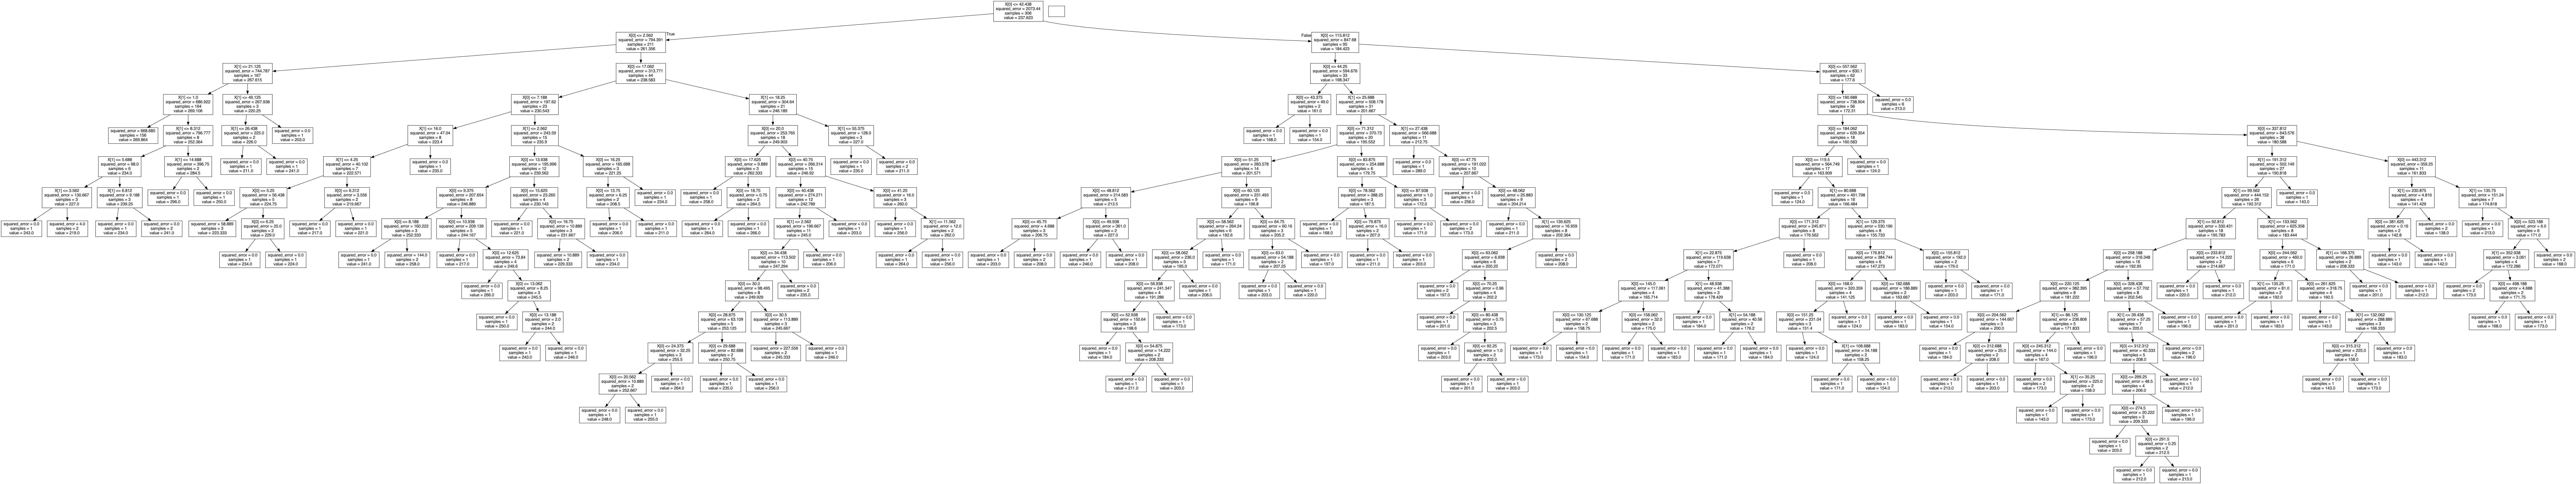

In [32]:
# Visualise the decision trees of the RFR
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import os
!pip install pydotplus
import pydotplus

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\lib\graphviz"
dot_data = StringIO()
export_graphviz(pipe.named_steps['regressor'].estimators_[0], out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

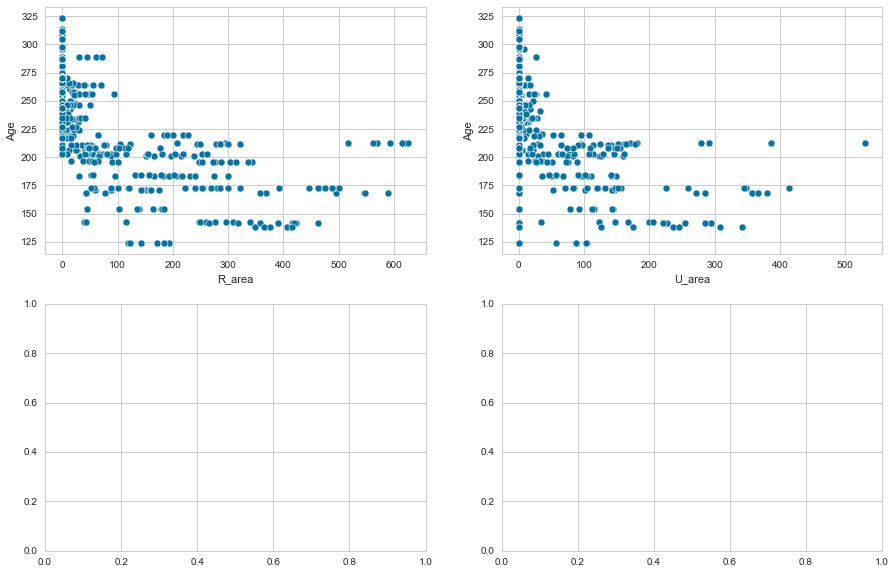

-0.6549491280892047
-0.5213582027074581


In [33]:
# Pearson's correlation

# Pearson's correlation set up
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams 
import scipy 
from scipy.stats.stats import pearsonr

%matplotlib inline 
rcParams['figure.figsize'] = 8,4
plt.style.use('seaborn-whitegrid')

mydata = pd.read_csv('MT1-area-radiusandulna-aim.csv')
mydata.columns = ['URN', 'R_area', 'U_area', 'Age']
X = mydata.drop(['URN', 'Age'], axis = 1)
y = mydata['Age']
fig,axis = plt.subplots (2,2, figsize = (15,10))
sb.scatterplot (x = 'R_area', y = 'Age', data = mydata, ax=axis[0,0])
sb.scatterplot (x = 'U_area', y = 'Age', data = mydata, ax=axis[0,1])
#sb.scatterplot (x = 'Rep_area', y = 'Age_in_months', data = mydata, ax=axis[1,0])
#sb.scatterplot (x = 'Uep_area', y = 'Age_in_months', data = mydata, ax=axis[1,1])
plt.show()

corr1,_ = pearsonr(mydata['Age'], mydata['R_area'])
corr2,_ = pearsonr(mydata['Age'], mydata['U_area'])
print(corr1)
print(corr2)